In [11]:
import pandas
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix


array([[ 3.17500754e-05,  1.56362981e-04,  2.66355834e-05, ...,
         9.74620209e-06,  1.44464140e-04, -4.66152371e-04],
       [ 3.16593086e-05,  8.00883563e-05,  2.37905784e-05, ...,
         8.04636972e-06,  1.44387865e-04, -4.66114234e-04],
       [ 2.76777732e-05,  1.98314025e-04,  3.16087217e-05, ...,
         1.06870661e-05,  1.44349728e-04, -4.66190508e-04],
       ...,
       [ 6.48334313e-06,  6.48334313e-05,  1.98525410e-05, ...,
         8.86934728e-06,  1.50375423e-04, -4.62300503e-04],
       [ 7.12099900e-06,  6.86471626e-05,  2.03253299e-05, ...,
         8.09734917e-06,  1.50375423e-04, -4.62681876e-04],
       [ 9.10947847e-06,  6.10197001e-05,  2.00400784e-05, ...,
         9.98046273e-06,  1.50146599e-04, -4.62376777e-04]])

In [36]:


#import dataset
raw = fetch_california_housing(as_frame=True)

#get input and output
X = raw.data.values
X=normalize_2d(X)
Y = raw.target.values
n = len(X)
r = 0.25
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=r)

x_val = x_train[:int(n*r)]
part_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
part_y_train = y_train[int(n*r):]

In [38]:
np.shape(part_x_train.T)

(8, 10320)

In [41]:
from keras import models
from keras import layers
from keras import optimizers

model_noreg = models.Sequential()

model_noreg.add(layers.InputLayer(input_shape=(8,)))
# model_noreg.add(layers.Dropout(0))
model_noreg.add(layers.Dense(32,activation='sigmoid'))
# model_noreg.add(layers.Dropout(0))
model_noreg.add(layers.Dense(16,activation='sigmoid'))
# model_noreg.add(layers.Dropout(0))
model_noreg.add(layers.Dense(1,activation='relu'))

opt = optimizers.SGD(learning_rate=0.01)
model_noreg.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['accuracy'])

historyBefore = model_noreg.fit(part_x_train,
                    part_y_train,
                    epochs=25,
                    batch_size=1
                    )

Epoch 1/25
10320/10320 [==============================] - 13s 1ms/step - loss: 5.5954 - accuracy: 0.0000e+00
Epoch 2/25
10320/10320 [==============================] - 12s 1ms/step - loss: 5.5954 - accuracy: 0.0000e+00
Epoch 3/25
 3458/10320 [=========>....................] - ETA: 7s - loss: 5.4490 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [27]:
thing = model_noreg.predict(x_test)




162/162 [==============================] - 0s 1ms/step


In [28]:
thing.

array([[2.0772812],
       [2.0772812],
       [2.0772812],
       ...,
       [2.0772812],
       [2.0772812],
       [2.0772812]], dtype=float32)

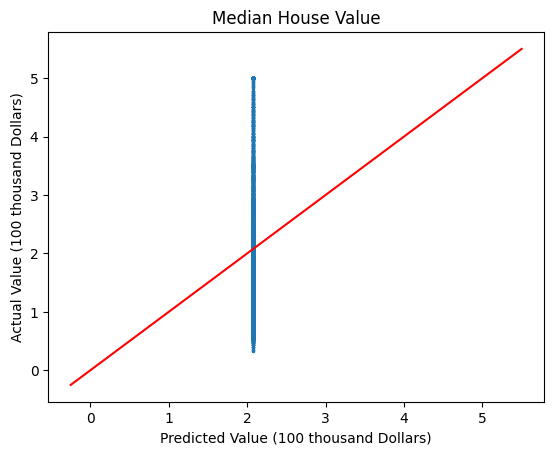

In [29]:
plt.scatter(thing,y_test,s=2)
plt.title('Median House Value')
plt.xlabel('Predicted Value (100 thousand Dollars)')
plt.ylabel('Actual Value (100 thousand Dollars)')
x_temp=[-.25,5.5]
y_temp=[-0.25,5.5]
plt.plot(x_temp, y_temp, 'r')
plt.show()